# **Predicting Changes in Positive and Negative Emotions from Coronavirus-related Variables**
Lindsay Warrenburg  
lindsay.a.warrenburg@gmail.com  
Final version: December 20, 2020

### This script describes Step 2 of investigating individual differences in lockdown situations and music-related behaviors.

- A series of linear regression analyses was conducted to examine the degree to which the pandemic and lockdown measures influenced emotions
- Changes in *Negative Emotions* (Factor 1 from Step 1) and *Positive Emotions* (Factor 3 from Step 1) are the dependent variables
- Three different sets of predictors were used: (1) Contact with the COVID-19 Virus, (2) Work Situation due to the Pandemic, and (3) Living Situation during the Pandemic

In [2]:
import numpy as np, pandas as pd, os, sys, seaborn as sns, warnings, matplotlib.pyplot as plt, statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
plt.rcParams['figure.figsize'] = (14,4)
warnings.filterwarnings(action='ignore')
%run Coronavirus_Music_Functions.ipynb

In [3]:
all_data = pd.read_csv('factors_all_data.csv') 
all_data.rename(columns={'Demographics_General_Gender': 'Gender'}, inplace=True)
all_data.columns = all_data.columns.str.replace(r'^.*_', '', regex=True)
all_data.shape

(5113, 240)

In [4]:
living = [c for c in all_data.columns if c.startswith('Living Situation') and 'No Response' not in c]
work = [c for c in all_data.columns if c.startswith('Ways Work Affected') and 'No Response' not in c]
covid = [c for c in all_data.columns if c.startswith('Infected with COVID') and 'No Response' not in c]
col_list = living + work + covid

all_X = all_data.loc[:,col_list]
all_X.reset_index(inplace = True, drop = True)

# **Negative Emotions**

In [4]:
y = all_data.loc[:,'F1']

### Contact with the COVID-19 Virus

<AxesSubplot:>

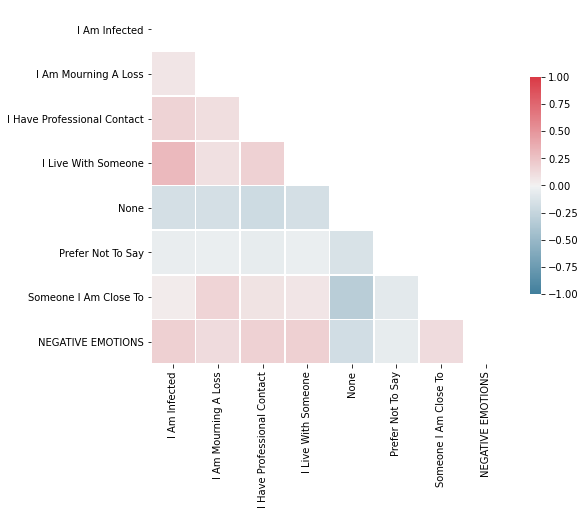

In [5]:
# correlations
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [6]:
# regression
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
f1_covid_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     64.44
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          4.94e-101
Time:                        18:01:41   Log-Likelihood:                -6687.0
No. Observations:                5113   AIC:                         1.339e+04
Df Residuals:                    5105   BIC:                         1.345e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0148      0.021     -0.723      0.470      -0.055       0.025
I Am Infected                   0.5337      0.069      7.698      0.000       0.398       0.670
I Am Mourning A Loss            0.3385      0.068      4.996      0.000       0.206       0.471
I Have Professional Contact     0.4260      0.057      7.517      0.000       0.315       0.537
I Live With Someone             0.5395      0.072      7.475      0.000       0.398       0.681
None                           -0.1820      0.028     -6.416      0.000      -0.238      -0.126
Prefer Not To Say              -0.2277      0.068     -3.342      0.001      -0.361      -0.094
Someone I Am Close To           0.1523      0.040      3.855      0.000       0.075       0.230
==============================================================================
Omnibus:                      212.095   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.390
Skew:                          -0.452   Prob(JB):                     1.05e-57
Kurtosis:                       3.642   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Work Situation due to the Pandemic

<AxesSubplot:>

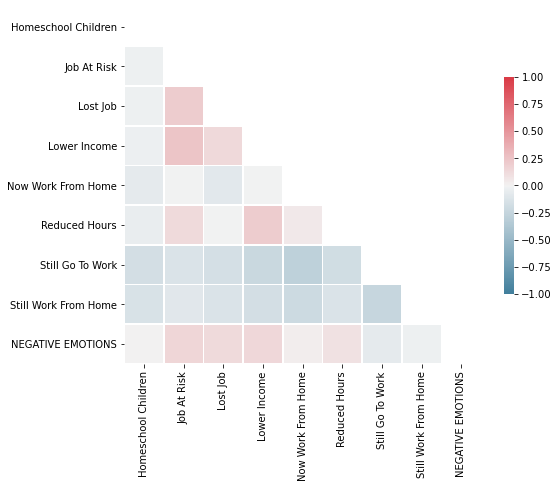

In [7]:
# correlations
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [8]:
# regression
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
f1_work_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     29.86
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           2.75e-51
Time:                        18:01:42   Log-Likelihood:                -6801.7
No. Observations:                5113   AIC:                         1.362e+04
Df Residuals:                    5104   BIC:                         1.369e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2256      0.031     -7.222      0.000      -0.287      -0.164
Homeschool Children      0.0950      0.045      2.129      0.033       0.008       0.183
Job At Risk              0.3799      0.054      7.025      0.000       0.274       0.486
Lost Job                 0.3743      0.049      7.624      0.000       0.278       0.470
Lower Income             0.2710      0.037      7.373      0.000       0.199       0.343
Now Work From Home       0.1329      0.035      3.819      0.000       0.065       0.201
Reduced Hours            0.1792      0.039      4.612      0.000       0.103       0.255
Still Go To Work         0.0835      0.038      2.226      0.026       0.010       0.157
Still Work From Home     0.1383      0.038      3.683      0.000       0.065       0.212
==============================================================================
Omnibus:                      166.522   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.135
Skew:                          -0.392   Prob(JB):                     2.11e-44
Kurtosis:                       3.573   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Living Situation during the Pandemic

,Alone,Child,Elderly,Friend,Other,Parent,Partner,Pet,Shared,SibCous,NEGATIVE EMOTIONS
Alone,1.000000,-0.277271,-0.039031,-0.044040,-0.051112,-0.190413,-0.485809,-0.140993,-0.023198,-0.076748,0.008425
Child,-0.277271,1.000000,-0.029481,-0.063589,-0.068727,-0.132572,0.336304,0.132300,-0.052683,-0.096854,0.079711
Elderly,-0.039031,-0.029481,1.000000,0.006079,-0.006888,0.043517,-0.073047,0.019400,0.002701,0.115426,-0.014728
Friend,-0.044040,-0.063589,0.006079,1.000000,0.014932,-0.023096,-0.112287,-0.004614,0.066156,0.001846,0.069003
Other,-0.051112,-0.068727,-0.006888,0.014932,1.000000,-0.049649,-0.071486,-0.006761,-0.009725,-0.014928,-0.004232
Parent,-0.190413,-0.132572,0.043517,-0.023096,-0.049649,1.000000,-0.380070,-0.049603,-0.004126,0.295487,0.028654
Partner,-0.485809,0.336304,-0.073047,-0.112287,-0.071486,-0.380070,1.000000,0.090050,-0.115378,-0.207843,-0.025089
Pet,-0.140993,0.132300,0.019400,-0.004614,-0.006761,-0.049603,0.090050,1.000000,0.008337,0.013863,-0.001554
Shared,-0.023198,-0.052683,0.002701,0.066156,-0.009725,-0.004126,-0.115378,0.008337,1.000000,0.024453,0.056930
SibCous,-0.076748,-0.096854,0.115426,0.001846,-0.014928,0.295487,-0.207843,0.013863,0.024453,1.000000,0.030185


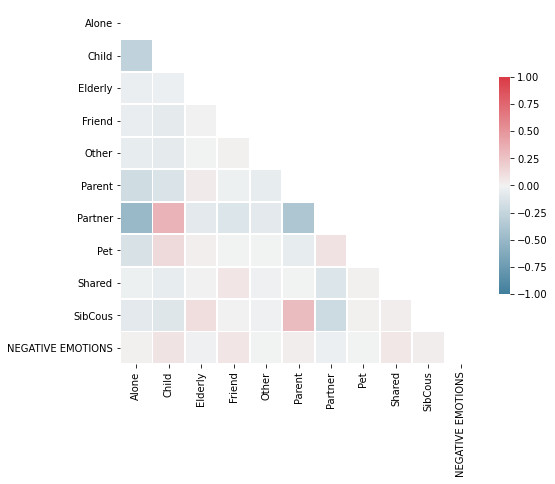

In [9]:
# correlations
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['NEGATIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

corr = data.corr()
corr

In [10]:
# regression
X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit(L1_wt=1, refit=True)
f1_living_r2 = avg_results.rsquared
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F1   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     10.73
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           2.97e-18
Time:                        18:01:42   Log-Likelihood:                -6879.7
No. Observations:                5113   AIC:                         1.378e+04
Df Residuals:                    5102   BIC:                         1.385e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1475      0.039     -3.755      0.000      -0.225      -0.070
Alone          0.1542      0.050      3.093      0.002       0.056       0.252
Child          0.2278      0.030      7.474      0.000       0.168       0.288
Elderly       -0.1091      0.102     -1.066      0.286      -0.310       0.092
Friend         0.5539      0.103      5.397      0.000       0.353       0.755
Other          0.0649      0.098      0.662      0.508      -0.127       0.257
Parent         0.1211      0.042      2.877      0.004       0.039       0.204
Partner        0.0146      0.039      0.374      0.708      -0.062       0.091
Pet           -0.0150      0.033     -0.460      0.646      -0.079       0.049
Shared         0.3967      0.094      4.224      0.000       0.213       0.581
SibCous        0.1511      0.069      2.201      0.028       0.017       0.286
==============================================================================
Omnibus:                      106.230   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.438
Skew:                          -0.301   Prob(JB):                     9.52e-28
Kurtosis:                       3.472   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Positive Emotions**

In [11]:
y = all_data.loc[:,'F3']

### Contact with the COVID-19 Virus

<AxesSubplot:>

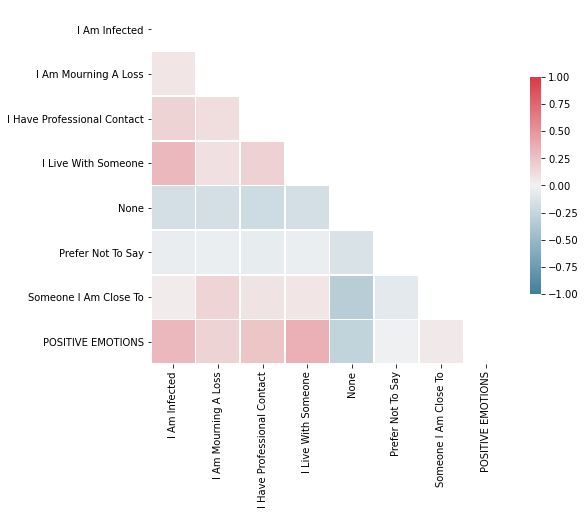

In [12]:
# correlations
data = all_X.loc[:,covid]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [13]:
# regression
X = all_X.loc[:,covid]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          4.62e-286
Time:                        18:01:43   Log-Likelihood:                -5867.8
No. Observations:                5113   AIC:                         1.175e+04
Df Residuals:                    5105   BIC:                         1.181e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0321      0.017      1.838      0.066      -0.002       0.066
I Am Infected                   0.8095      0.059     13.705      0.000       0.694       0.925
I Am Mourning A Loss            0.4326      0.058      7.493      0.000       0.319       0.546
I Have Professional Contact     0.5032      0.048     10.422      0.000       0.409       0.598
I Live With Someone             1.1223      0.061     18.250      0.000       1.002       1.243
None                           -0.3145      0.024    -13.013      0.000      -0.362      -0.267
Prefer Not To Say              -0.0526      0.058     -0.906      0.365      -0.166       0.061
Someone I Am Close To          -0.1438      0.034     -4.270      0.000      -0.210      -0.078
==============================================================================
Omnibus:                       49.727   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.593
Skew:                           0.068   Prob(JB):                     1.42e-17
Kurtosis:                       3.588   Cond. No.                         7.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Work Situation due to the Pandemic

<AxesSubplot:>

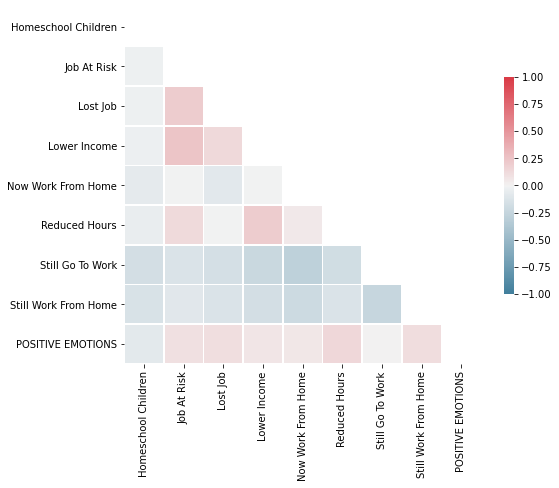

In [14]:
# correlations
data = all_X.loc[:,work]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [15]:
# regression
X = all_X.loc[:,work]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     60.53
Date:                Sun, 20 Dec 2020   Prob (F-statistic):          8.11e-106
Time:                        18:01:43   Log-Likelihood:                -6284.0
No. Observations:                5113   AIC:                         1.259e+04
Df Residuals:                    5104   BIC:                         1.265e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4835      0.028    -17.126      0.000      -0.539      -0.428
Homeschool Children      0.0747      0.040      1.851      0.064      -0.004       0.154
Job At Risk              0.2684      0.049      5.491      0.000       0.173       0.364
Lost Job                 0.5077      0.044     11.445      0.000       0.421       0.595
Lower Income             0.1734      0.033      5.221      0.000       0.108       0.239
Now Work From Home       0.3611      0.031     11.486      0.000       0.300       0.423
Reduced Hours            0.4602      0.035     13.102      0.000       0.391       0.529
Still Go To Work         0.4227      0.034     12.465      0.000       0.356       0.489
Still Work From Home     0.5592      0.034     16.485      0.000       0.493       0.626
==============================================================================
Omnibus:                      367.019   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.456
Skew:                           0.546   Prob(JB):                    3.74e-134
Kurtosis:                       4.300   Cond. No.                         5.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Living Situation during the Pandemic

<AxesSubplot:>

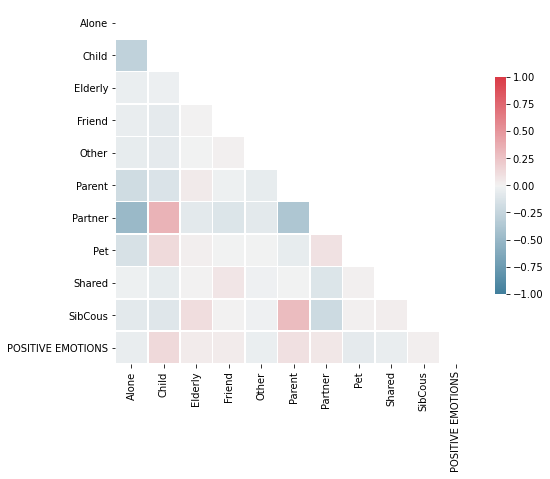

In [16]:
# correlations
data = all_X.loc[:,living]
data.columns = data.columns.str.replace(r'^.*-', '', regex=True)
data['POSITIVE EMOTIONS'] = y
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = cmap, fmt = '.2g', vmax = 1.0, vmin = -1.0, center = 0, square = True, \
            mask = mask, linewidths = 0.7, cbar_kws = {"shrink": 0.5}, annot = False)

In [17]:
# regression
X = all_X.loc[:,living]
X.columns = X.columns.str.replace(r'^.*-', '', regex=True)
X = sm.add_constant(X)

avg_ols_model = sm.OLS(y, X)
avg_results = avg_ols_model.fit_regularized(L1_wt=1, refit=True)
avg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     F3   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     26.27
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           7.37e-54
Time:                        18:01:44   Log-Likelihood:                -6402.4
No. Observations:                5113   AIC:                         1.283e+04
Df Residuals:                    5102   BIC:                         1.291e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3313      0.036     -9.259      0.000      -0.402      -0.261
Alone          0.2321      0.045      5.112      0.000       0.143       0.321
Child          0.2949      0.028     10.626      0.000       0.241       0.349
Elderly        0.3234      0.093      3.469      0.001       0.141       0.506
Friend         0.4597      0.093      4.917      0.000       0.276       0.643
Other          0.0069      0.089      0.077      0.939      -0.168       0.182
Parent         0.3975      0.038     10.371      0.000       0.322       0.473
Partner        0.2525      0.035      7.118      0.000       0.183       0.322
Pet           -0.1638      0.030     -5.505      0.000      -0.222      -0.105
Shared        -0.1202      0.086     -1.405      0.160      -0.288       0.048
SibCous        0.0643      0.063      1.028      0.304      -0.058       0.187
==============================================================================
Omnibus:                      528.630   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              982.381
Skew:                           0.693   Prob(JB):                    4.77e-214
Kurtosis:                       4.641   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""